In this notebook I'll select a few variables from this 'Microbes' dataset that offers different descriptive elements of these micro-organisms in order to present ways de detect outliers.

* using Normal Distribution: outliers are all the values lower than 3 standard deviations from the mean and all the values above 3 standard deviations from the mean
* using the Interquartile Range: outliers are all the values lower than Q1 – 1.5 IQR and all the values above Q3 + 1.5 IQR , where IQR is the difference between 25th and 75th percentile

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/microbes-dataset/microbes.csv


In [2]:
# reading file and having a look at the data
df = pd.read_csv('/kaggle/input/microbes-dataset/microbes.csv')
df.head()

,Unnamed: 0,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,0,10.70,15.8,5.43,3.75,0.785,8.14,2.15,22.3,2.97,...,2.97,1.34,1.61,0.683,0.195,3.63,12.10,1.310,7.99,Spirogyra
1,1,5.60,18.3,4.14,6.16,0.364,3.51,18.60,22.5,5.41,...,5.47,1.52,1.52,1.010,0.215,6.01,20.60,0.765,7.99,Spirogyra
2,2,8.32,19.8,4.63,6.66,0.415,5.85,21.00,22.4,5.96,...,5.96,1.63,1.38,1.110,0.182,6.55,11.50,0.953,7.99,Spirogyra
3,3,10.10,17.9,7.29,11.10,1.470,6.30,9.94,21.9,8.81,...,8.88,2.04,2.12,0.715,0.371,10.30,12.00,2.340,7.99,Spirogyra
4,4,6.27,20.2,20.10,10.70,14.700,3.97,2.58,11.9,10.20,...,10.20,7.78,6.21,6.800,4.440,14.00,9.55,17.600,7.99,Spirogyra


In [3]:
import matplotlib.pyplot as plt


Let's select a variable, 'Eccentricity', very skewed, as we can see from the histogram:

<AxesSubplot:>

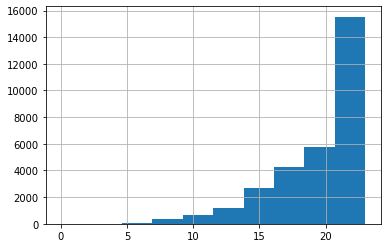

In [4]:
df['Eccentricity'].hist()

In [5]:
df['Eccentricity'].describe()

count    30527.000000
mean        19.466921
std          3.479828
min          0.000000
25%         17.300000
50%         20.700000
75%         22.200000
max         23.000000
Name: Eccentricity, dtype: float64

## I. First detection method, using mean and standard deviation

In [6]:
mean = df['Eccentricity'].mean()
std = df['Eccentricity'].std()

lower_limit = mean - 3*std
higher_limit = mean + 3*std

print('The mean is: ' + str(mean))
print('The standard deviation is: ' + str(std))
print('The lower limit is: ' + str(lower_limit))
print('The lower limit is: ' + str(higher_limit))


The mean is: 19.466921413830377
The standard deviation is: 3.4798282487945142
The lower limit is: 9.027436667446835
The lower limit is: 29.90640616021392


So we see the minimum values are below the lower_limit.
Let's bring these outliers to their respective limits and represent the variable again:

AxesSubplot(0.125,0.125;0.775x0.755)


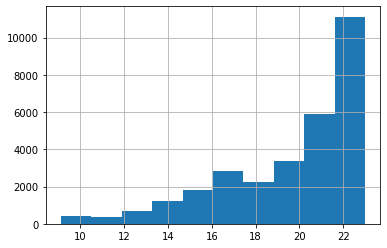

In [7]:
df_new = df[(df['Eccentricity'] > lower_limit) & (df['Eccentricity'] < higher_limit)]
print(df_new['Eccentricity'].hist())


In [8]:
print(df_new['Eccentricity'].describe())

count    30095.000000
mean        19.640205
std          3.182073
min          9.110000
25%         17.500000
50%         20.800000
75%         22.200000
max         23.000000
Name: Eccentricity, dtype: float64


We see now min has changed, while max remained the same.

## II. Second detection method, using IQR

In [9]:
Q1 = np.percentile(df['Eccentricity'],25)
Q3 = np.percentile(df['Eccentricity'],75)

IQR = Q3 - Q1

print('The Interquartile Range is: ' + str(IQR))

The Interquartile Range is: 4.899999999999999


Let's calculate the limits, based on IQR, and then remove values that are outside the Interquartile Range:

In [10]:
lower_limit_method_2 = Q1 - 1.5*IQR
higher_limit_method_2 = Q3 + 1.5*IQR

print('The lower limit is: ' + str(lower_limit_method_2))
print('The lower limit is: ' + str(higher_limit_method_2))

The lower limit is: 9.950000000000003
The lower limit is: 29.549999999999997


In [11]:
df_new_method_2 = df[(df['Eccentricity'] >lower_limit_method_2) & (df['Eccentricity'] < higher_limit_method_2)]

Let's have a look at the variable after the outlier transformation:

AxesSubplot(0.125,0.125;0.775x0.755)
count    30095.000000
mean        19.640205
std          3.182073
min          9.110000
25%         17.500000
50%         20.800000
75%         22.200000
max         23.000000
Name: Eccentricity, dtype: float64


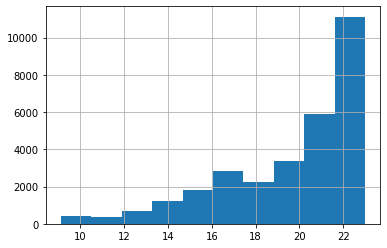

In [12]:
print(df_new['Eccentricity'].hist())
print(df_new['Eccentricity'].describe())